In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [259]:
data = pd.read_csv("Ames_train.csv")

In [260]:
data

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,527402250,20,RL,NaN,12537,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,149900
1,923225240,160,RM,41.0,2665,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,127000
2,534178010,20,RL,80.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,COD,Normal,127000
3,905452160,20,RL,75.0,9525,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,128000
4,535376100,30,RL,60.0,5400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml,108480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339,535478090,20,RL,70.0,7000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,2,2006,WD,Normal,105000
2340,528292060,60,RL,41.0,12460,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,225000
2341,531453100,60,RL,NaN,10274,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,162000
2342,905403150,20,RL,85.0,10452,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,155000


# Train Round

## Area Variables

In [261]:
area_data = data[['Garage Area','Lot Area','Gr Liv Area','Mas Vnr Area','Total Bsmt SF']].copy() 
#We selected these variables that we assume relevant to predict the sales price; 
#Further explanation in the pdf file
area_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Garage Area    2343 non-null   float64
 1   Lot Area       2344 non-null   int64  
 2   Gr Liv Area    2344 non-null   int64  
 3   Mas Vnr Area   2324 non-null   float64
 4   Total Bsmt SF  2343 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 91.7 KB


In [262]:
#We added this Feature Engineering Variable to understand the ratio of the built house to the available lot area
#The lower the ratio it means that living area is smaller than the total lot area/property
area_data['FE_Living_LotAreaRatio'] = area_data['Gr Liv Area']/area_data['Lot Area']

## Quality and Conditions

In [263]:
qc_data = data[['Heating QC','Kitchen Qual','Overall Qual','Exter Qual']].copy()
#We selected these variables that we assume relevant to predict the sales price; 
#Further explanation in the pdf file
qc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Heating QC    2344 non-null   object
 1   Kitchen Qual  2344 non-null   object
 2   Overall Qual  2344 non-null   int64 
 3   Exter Qual    2344 non-null   object
dtypes: int64(1), object(3)
memory usage: 73.4+ KB


In [264]:
#Categorical data such as Heating QC, Kitchen Qual, and Exter Qual is transformed to Ordinal-Numerical based on the mapping
#...found below. 

qualitynum_data = pd.DataFrame(qc_data)
quality_mapping = {
    'Ex': 5,  # Excellent
    'Gd': 4,  # Good
    'TA': 3,  # Average/Typical
    'Fa': 2,  # Fair
    'Po': 1,  # Poor
    'NA': 0,  # No Basement
    np.nan: 0  # Assuming you want to treat NaN as 0 or you could exclude it if NaN handling is different
}
qualitynum_data_numeric = qualitynum_data.applymap(lambda x: quality_mapping.get(x, x))
print(qualitynum_data_numeric)

      Heating QC  Kitchen Qual  Overall Qual  Exter Qual
0              5             3             5           3
1              5             3             5           3
2              3             3             6           3
3              3             3             5           3
4              5             3             5           3
...          ...           ...           ...         ...
2339           4             3             5           3
2340           5             3             7           4
2341           3             3             6           3
2342           5             3             6           3
2343           2             3             6           3

[2344 rows x 4 columns]


## Features

In [265]:
#We selected these variables that we assume relevant to predict the sales price; 
#Further explanation in the pdf file
features_data = data[[
    'Full Bath',
    'Half Bath',
    'Bedroom AbvGr',
    'Central Air',
    'Neighborhood',
]].copy()
features_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Full Bath      2344 non-null   int64 
 1   Half Bath      2344 non-null   int64 
 2   Bedroom AbvGr  2344 non-null   int64 
 3   Central Air    2344 non-null   object
 4   Neighborhood   2344 non-null   object
dtypes: int64(3), object(2)
memory usage: 91.7+ KB


In [266]:
#The data for Central Air is modified to binary using the code below
features_data['Central Air'] = features_data['Central Air'].map({'Y': 1, 'N': 0})

#One Hot Encoding is implemented to the neighborhood data, creating new columns in the dataframe
neighborhood_dummies = pd.get_dummies(features_data['Neighborhood'], prefix='Neighborhood')

features_data.drop(['Neighborhood'], axis=1, inplace=True)
features_data_numerical = pd.concat([features_data, neighborhood_dummies], axis=1)

In [267]:
#We added 2 Feature Engineering Variables
#First to get the Total Number of Bathrooms within the property
#We also created a new variable of ratio of #of TotalBath to Bedroom

features_data_numerical['FE_TotalBath'] = features_data_numerical['Full Bath']+features_data_numerical['Half Bath']
features_data_numerical['FE_RatioBedtoBath'] = features_data_numerical['FE_TotalBath']+features_data_numerical['Bedroom AbvGr']


In [268]:
features_data_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Full Bath             2344 non-null   int64
 1   Half Bath             2344 non-null   int64
 2   Bedroom AbvGr         2344 non-null   int64
 3   Central Air           2344 non-null   int64
 4   Neighborhood_Blmngtn  2344 non-null   uint8
 5   Neighborhood_Blueste  2344 non-null   uint8
 6   Neighborhood_BrDale   2344 non-null   uint8
 7   Neighborhood_BrkSide  2344 non-null   uint8
 8   Neighborhood_ClearCr  2344 non-null   uint8
 9   Neighborhood_CollgCr  2344 non-null   uint8
 10  Neighborhood_Crawfor  2344 non-null   uint8
 11  Neighborhood_Edwards  2344 non-null   uint8
 12  Neighborhood_Gilbert  2344 non-null   uint8
 13  Neighborhood_Greens   2344 non-null   uint8
 14  Neighborhood_GrnHill  2344 non-null   uint8
 15  Neighborhood_IDOTRR   2344 non-null   uint8
 16  Neighb

## Year

In [269]:
#We selected these variables that we assume relevant to predict the sales price; 
#Further explanation in the pdf file
year_data = data[[
    'Year Built',
    'Year Remod/Add',
]].copy()
year_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Year Built      2344 non-null   int64
 1   Year Remod/Add  2344 non-null   int64
dtypes: int64(2)
memory usage: 36.8 KB


In [270]:
#We added this Feature Engineering the years since the last remodel and if the house was not remodeled it is 
#..the Years Since Remodeled will be the total years since the house was built
year_data['FE_YearsSinceRemod'] = 2010 - year_data['Year Remod/Add']
year_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Year Built          2344 non-null   int64
 1   Year Remod/Add      2344 non-null   int64
 2   FE_YearsSinceRemod  2344 non-null   int64
dtypes: int64(3)
memory usage: 55.1 KB


## Combining All Data Frames

In [271]:
#We combined all the created variables back to one main data frame
x = pd.concat([area_data,qualitynum_data_numeric,features_data_numerical,year_data], axis=1)
x = x.fillna(0)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Garage Area             2344 non-null   float64
 1   Lot Area                2344 non-null   int64  
 2   Gr Liv Area             2344 non-null   int64  
 3   Mas Vnr Area            2344 non-null   float64
 4   Total Bsmt SF           2344 non-null   float64
 5   FE_Living_LotAreaRatio  2344 non-null   float64
 6   Heating QC              2344 non-null   int64  
 7   Kitchen Qual            2344 non-null   int64  
 8   Overall Qual            2344 non-null   int64  
 9   Exter Qual              2344 non-null   int64  
 10  Full Bath               2344 non-null   int64  
 11  Half Bath               2344 non-null   int64  
 12  Bedroom AbvGr           2344 non-null   int64  
 13  Central Air             2344 non-null   int64  
 14  Neighborhood_Blmngtn    2344 non-null   

In [272]:
y = data[['SalePrice']] #create the y data
x.shape, y.shape

((2344, 47), (2344, 1))

## Initial Training of Model

In [223]:
#Initial creation of the Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree_reg = DecisionTreeRegressor(
    random_state = 42,
    min_samples_leaf = 4, #Initial guess of hyperparameters
    max_depth = 9)

tree_reg.fit(x,y)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=4, random_state=42)

In [224]:
#
train_predicted = tree_reg.predict(x)
print (mean_squared_error(np.log(y),
                         np.log(train_predicted),
                         squared=False))

0.11848382912990661


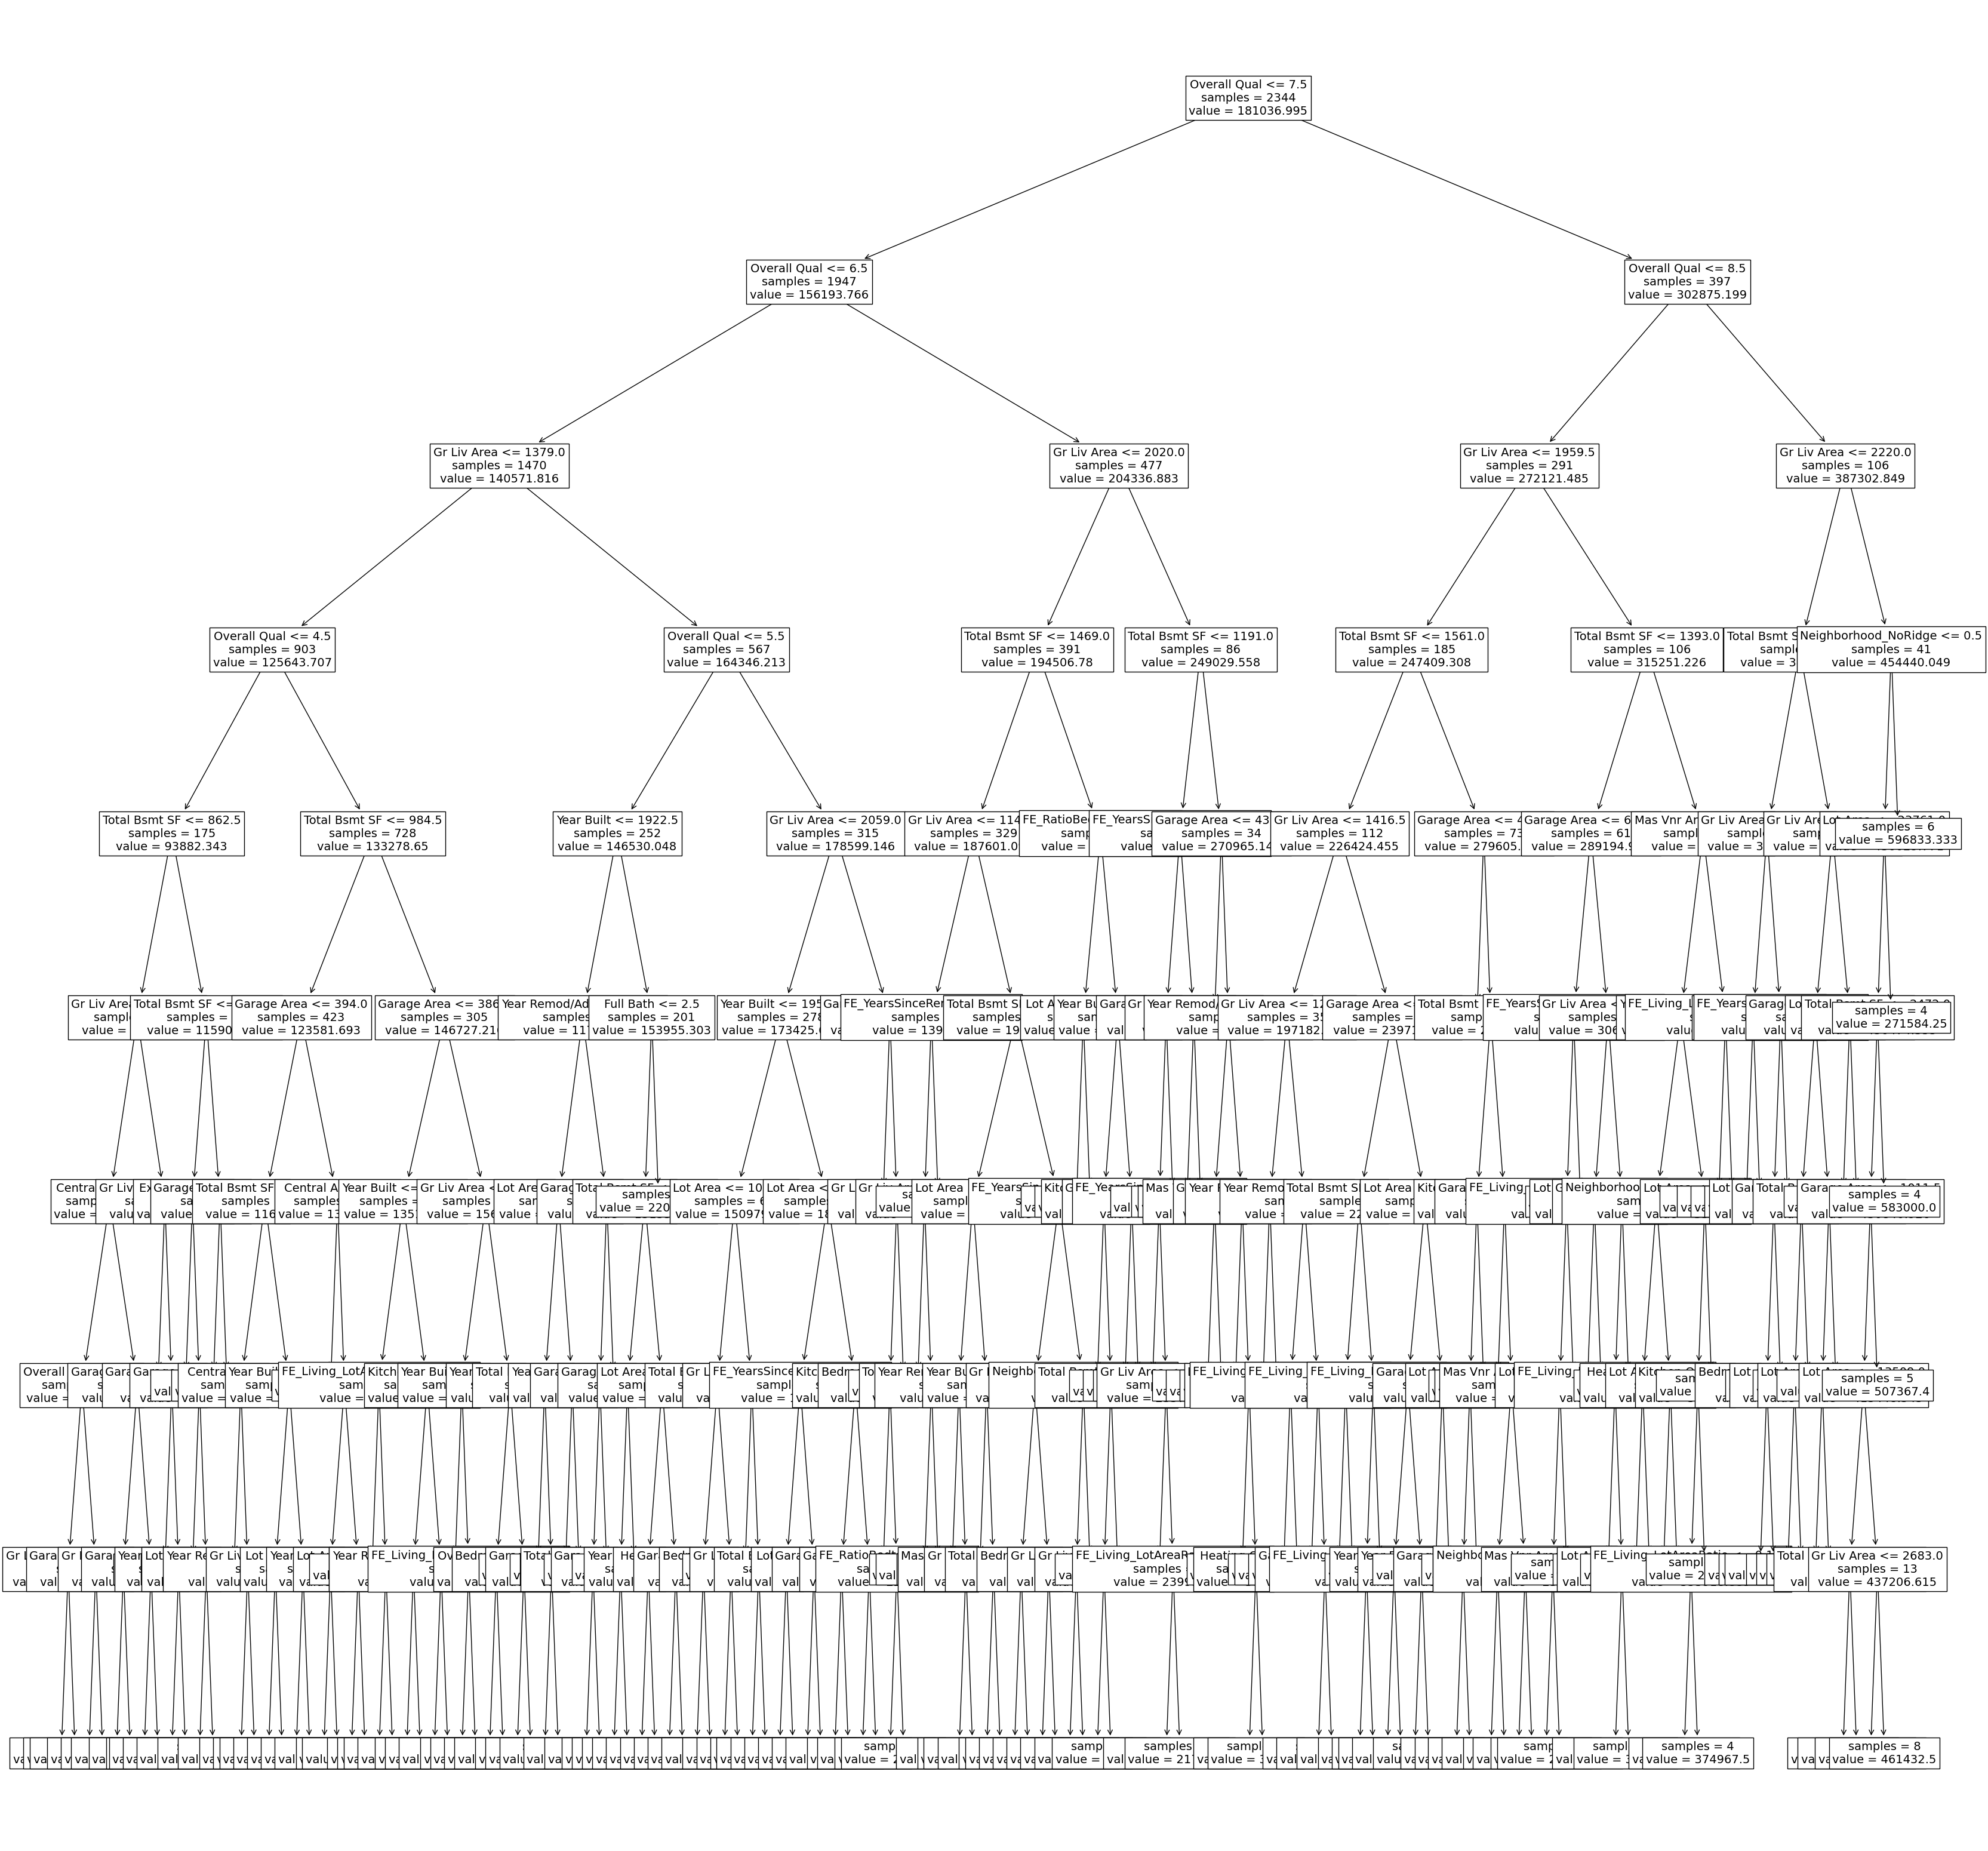

In [225]:
#We try to graph how the decision tree looks like for the initial model trained
from sklearn import tree
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

# Let's take a look at how the tree looks like

figure(figsize=(40, 40))

tree.plot_tree(tree_reg, max_depth=9, feature_names=x.columns.tolist(), fontsize=14, label="all", impurity=False)
plt.show()

## Validation

In [226]:
#We created a validtion dataset in order to test hyperparameters that would give best model with low error
#We decided to split the Train data where 70% remain train, 30% in validation
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, 
                                                  y, 
                                                  test_size=0.3, 
                                                  random_state=42)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((1640, 47), (704, 47), (1640, 1), (704, 1))

In [227]:
# We need to iterate through different number of min_samples_leaf and max_depth, 
# then train the model, and test it using logarithmic MSE
# in both train and validations sets:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

result_train_dict = {}
result_val_dict = {}

max_min_samples_leaf = 15
max_max_depth = 15

for m in range(3, max_max_depth+1, 2):
    for n in range(1, max_min_samples_leaf+1, 3):
        
        tree_reg = DecisionTreeRegressor(random_state=42, 
                                         min_samples_leaf=n, 
                                         max_depth=m)
        tree_reg.fit(x_train, y_train)

        train_predicted = tree_reg.predict(x_train)
        val_predicted = tree_reg.predict(x_val)

        result_train_dict[m, n] = mean_squared_error(np.log(y_train), 
                                                     np.log(train_predicted), 
                                                     squared = False)
        result_val_dict[m, n] = mean_squared_error(np.log(y_val), 
                                                   np.log(val_predicted), 
                                                   squared = False)

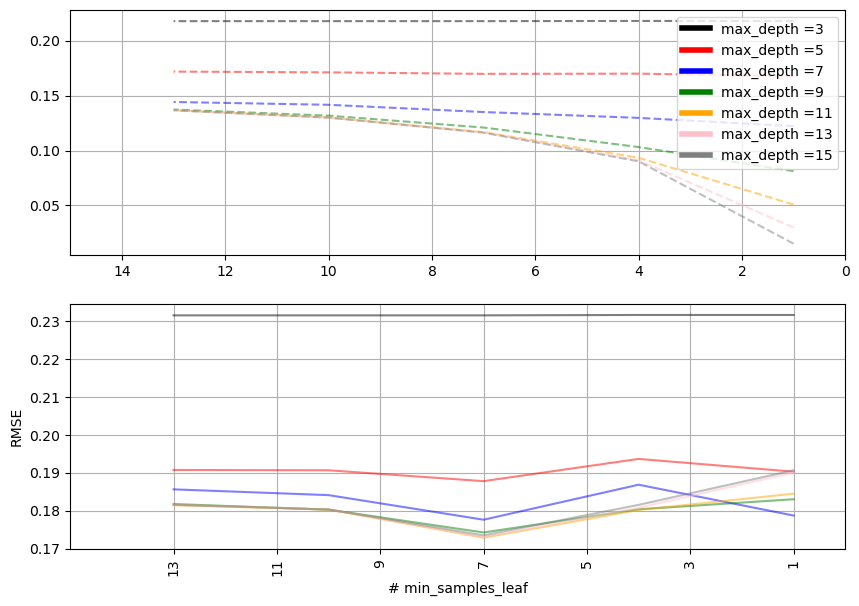

In [228]:
# We plot the different train and validation errors, 
# then we chose the best value for both max_depth and min_samples_leaf

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(1, 7))
colors= ['black', 'red', 'blue', 'green', 'orange', 'pink', 'gray']
color_index = 0
custom_lines = np.array([])
custom_names = np.array([])

x_axis = np.arange(start=1, stop=max_min_samples_leaf+1, step=3)

for m in range(3, max_max_depth+1, 2):
    
    line_plot_train = []
    line_plot_val = []
    
    for n in x_axis:
        line_plot_train.append(result_train_dict.get((m,n)))
        line_plot_val.append(result_val_dict.get((m,n)))

    ax1.plot(x_axis, line_plot_train, alpha=0.5, c=colors[color_index], linestyle='--')
    ax2.plot(x_axis, line_plot_val, alpha=0.5, c=colors[color_index])
    
    color_line = Line2D([0], [0], color=colors[color_index], lw=4)
    custom_lines = np.append(custom_lines,color_line)
    color_name = 'max_depth =' + str(m)
    custom_names = np.append(custom_names,color_name)
    color_index+=1

ax1.set_xlim(max_min_samples_leaf, 0)
ax2.set_xlim(max_min_samples_leaf, 0)

plt.xticks(np.arange(start=1, stop=max_min_samples_leaf, step=2), rotation=90, size=10)

ax1.grid(True)
ax2.grid(True)

plt.xlabel('# min_samples_leaf')
plt.ylabel('RMSE')

ax1.legend(custom_lines, custom_names)

plt.show()

Best of the generated graphs above, the optimal setting is having a max depth of 13 and min sample leaf of 7.

In [229]:
# We cannot determine which color gives the best MSE based on the graph (11 or 13) so we calculate
#..for both MSE erroer

tree_reg = DecisionTreeRegressor(random_state=42, min_samples_leaf=7, max_depth=11)
tree_reg.fit(x_train, y_train)

train_predicted = tree_reg.predict(x_train)
val_predicted = tree_reg.predict(x_val)

(mean_squared_error(np.log(y_train), np.log(train_predicted), squared = False),
 mean_squared_error(np.log(y_val), np.log(val_predicted), squared = False))

(0.11669406564797764, 0.1728632428688752)

In [230]:
#The results showed that the hyperparameters setting of min_samples_leaf 7 and max_depth 13 has the lower MSE
tree_reg = DecisionTreeRegressor(random_state=42, min_samples_leaf=7, max_depth=13)
tree_reg.fit(x_train, y_train)

train_predicted = tree_reg.predict(x_train)
val_predicted = tree_reg.predict(x_val)

(mean_squared_error(np.log(y_train), np.log(train_predicted), squared = False),
 mean_squared_error(np.log(y_val), np.log(val_predicted), squared = False))

(0.11635428734292795, 0.17302198180648545)

In [231]:
# We apply the model parameters to the whole train dataset
tree_reg = DecisionTreeRegressor(random_state=42, min_samples_leaf=7, max_depth=13)
tree_reg.fit(x, y)

train_predicted = tree_reg.predict(x)

mean_squared_error(np.log(y), np.log(train_predicted), squared = False)

0.11428379583598594

# Test Round

In [274]:
# Read the test csv file, and repeat the process:

test_df = pd.read_csv('Ames_test.csv')
test_df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
1,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
2,527358200,85,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,WD,Family,170000
3,527368020,60,FV,NaN,7500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,216000
4,527425090,20,RL,70.0,10500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,ConLI,Normal,115000


In [275]:
import pandas as pd
import numpy as np

#We select on the variables that we decided to utilize
test_df = test_df[['Garage Area', 'Lot Area', 'Gr Liv Area', 'Mas Vnr Area', 'Total Bsmt SF',
                   'Overall Cond', 'Heating QC', 'Kitchen Qual',
                   'Overall Qual', 'Exter Qual', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Central Air',
                   'Neighborhood', 'Year Built', 'Year Remod/Add','SalePrice']]

#We convert the categorical variables to numerical
quality_mapping = {
    'Ex': 5,  # Excellent
    'Gd': 4,  # Good
    'TA': 3,  # Average/Typical
    'Fa': 2,  # Fair
    'Po': 1,  # Poor
    'NA': 0,  # No Basement
    np.nan: 0  # Assuming you want to treat NaN as 0
}

for col in ['Heating QC', 'Kitchen Qual', 'Exter Qual']:
    test_df[col] = test_df[col].map(quality_mapping).fillna(0)  # fillna(0) may be redundant due to np.nan: 0 mapping

neighborhood_dummies = pd.get_dummies(test_df['Neighborhood'], prefix='Neighborhood')

test_df.drop(['Neighborhood'], axis=1, inplace=True)
test_df_numerical = pd.concat([test_df, neighborhood_dummies], axis=1)

# Assuming you want to print or inspect test_df_numerical after transformations
print(test_df_numerical.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Garage Area           586 non-null    float64
 1   Lot Area              586 non-null    int64  
 2   Gr Liv Area           586 non-null    int64  
 3   Mas Vnr Area          583 non-null    float64
 4   Total Bsmt SF         586 non-null    float64
 5   Overall Cond          586 non-null    int64  
 6   Heating QC            586 non-null    int64  
 7   Kitchen Qual          586 non-null    int64  
 8   Overall Qual          586 non-null    int64  
 9   Exter Qual            586 non-null    int64  
 10  Full Bath             586 non-null    int64  
 11  Half Bath             586 non-null    int64  
 12  Bedroom AbvGr         586 non-null    int64  
 13  Central Air           586 non-null    object 
 14  Year Built            586 non-null    int64  
 15  Year Remod/Add        5

In [276]:
# We convert 'Central Air' to binary variables
test_df_numerical['Central Air'] = test_df_numerical['Central Air'].map({'Y': 1, 'N': 0})
test_df_numerical.head()

,Garage Area,Lot Area,Gr Liv Area,Mas Vnr Area,Total Bsmt SF,Overall Cond,Heating QC,Kitchen Qual,Overall Qual,Exter Qual,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,730.0,11622,896,0.0,882.0,6,3,3,5,3,...,0,0,0,0,0,0,0,0,0,0
1,522.0,11160,2110,0.0,2110.0,5,5,5,7,4,...,0,0,0,0,0,0,0,0,0,0
2,528.0,10625,1173,81.0,1053.0,6,3,4,7,3,...,0,0,0,0,0,0,0,0,0,0
3,663.0,7500,1674,0.0,814.0,5,5,4,7,4,...,0,0,0,0,0,0,1,0,0,0
4,0.0,10500,864,0.0,864.0,5,3,3,4,3,...,0,0,0,0,0,0,0,0,0,0


In [277]:
#We applied all the Feature Engineering
test_df_numerical['FE_Living_LotAreaRatio'] = test_df_numerical['Gr Liv Area']/test_df_numerical['Lot Area']
test_df_numerical['FE_TotalBath'] = test_df_numerical['Full Bath']+test_df_numerical['Half Bath']
test_df_numerical['FE_RatioBedtoBath'] = test_df_numerical['FE_TotalBath']+test_df_numerical['Bedroom AbvGr']
test_df_numerical['FE_YearsSinceRemod'] = 2010 - test_df_numerical['Year Remod/Add']

In [278]:
#We have to create additional columns that are not present in test data set but are present in train
test_df_numerical['Neighborhood_GrnHill'] = 0
test_df_numerical['Neighborhood_Landmrk'] = 0

In [279]:
# We have to order the variables aligning right columns as the train model
column_order = [
    'Garage Area', 'Lot Area', 'Gr Liv Area', 'Mas Vnr Area', 'Total Bsmt SF',
    'FE_Living_LotAreaRatio', 'Heating QC', 'Kitchen Qual', 'Overall Qual',
    'Exter Qual', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Central Air',
    'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
    'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
    'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
    'Neighborhood_Greens', 'Neighborhood_GrnHill', 'Neighborhood_IDOTRR',
    'Neighborhood_Landmrk', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
    'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
    'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
    'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
    'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
    'Neighborhood_Veenker', 'FE_TotalBath', 'FE_RatioBedtoBath', 'Year Built',
    'Year Remod/Add', 'FE_YearsSinceRemod','SalePrice'
]

# Reorder the DataFrame columns
test_df_numerical = test_df_numerical[column_order]

# Now, test_df will have columns in the specified order


In [280]:
#We split the test data to x and y
x_test= test_df_numerical.drop(columns=['SalePrice']).fillna(0)
y_test = test_df_numerical[['SalePrice']].copy()

In [281]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Garage Area             586 non-null    float64
 1   Lot Area                586 non-null    int64  
 2   Gr Liv Area             586 non-null    int64  
 3   Mas Vnr Area            586 non-null    float64
 4   Total Bsmt SF           586 non-null    float64
 5   FE_Living_LotAreaRatio  586 non-null    float64
 6   Heating QC              586 non-null    int64  
 7   Kitchen Qual            586 non-null    int64  
 8   Overall Qual            586 non-null    int64  
 9   Exter Qual              586 non-null    int64  
 10  Full Bath               586 non-null    int64  
 11  Half Bath               586 non-null    int64  
 12  Bedroom AbvGr           586 non-null    int64  
 13  Central Air             586 non-null    int64  
 14  Neighborhood_Blmngtn    586 non-null    ui

In [282]:
#We apply the created model to the test data
y_test['SalePrice_predicted'] = tree_reg.predict(x_test)

In [283]:
#This is the result of the model and the predicted values
print(y_test)

     SalePrice  SalePrice_predicted
0       105000        135130.000000
1       244000        275722.222222
2       170000        175330.769231
3       216000        207617.375000
4       115000        106971.428571
..         ...                  ...
581     164000        163646.153846
582     151400        169875.000000
583      79400         83109.090909
584     140000        159971.428571
585      71000         83109.090909

[586 rows x 2 columns]


In [284]:
#We solve the difference between the price predicted and the actual
y_test['Difference'] = y_test['SalePrice_predicted'] - y_test['SalePrice']
print(y_test)

     SalePrice  SalePrice_predicted    Difference
0       105000        135130.000000  30130.000000
1       244000        275722.222222  31722.222222
2       170000        175330.769231   5330.769231
3       216000        207617.375000  -8382.625000
4       115000        106971.428571  -8028.571429
..         ...                  ...           ...
581     164000        163646.153846   -353.846154
582     151400        169875.000000  18475.000000
583      79400         83109.090909   3709.090909
584     140000        159971.428571  19971.428571
585      71000         83109.090909  12109.090909

[586 rows x 3 columns]


In [285]:
#We can see that the average difference is around $3,400 with the minimum at -$169k and max $359k
y_test.describe()

,SalePrice,SalePrice_predicted,Difference
count,586.000000,586.000000,586.000000
mean,179832.319113,182466.708790,2634.389678
std,81175.973541,80541.132933,33867.885852
min,12789.000000,52966.909091,-169329.230769
25%,129000.000000,129200.000000,-10590.000000
50%,159500.000000,159971.428571,3795.535714
75%,214000.000000,210526.800000,17134.415584
max,611657.000000,605633.285714,359064.857143


In [286]:
print(mean_squared_error(np.log(y_test['SalePrice']), 
                         np.log(y_test['SalePrice_predicted']), 
                         squared = False))

0.1941566309079346


array([[<Axes: title={'center': 'Difference'}>]], dtype=object)

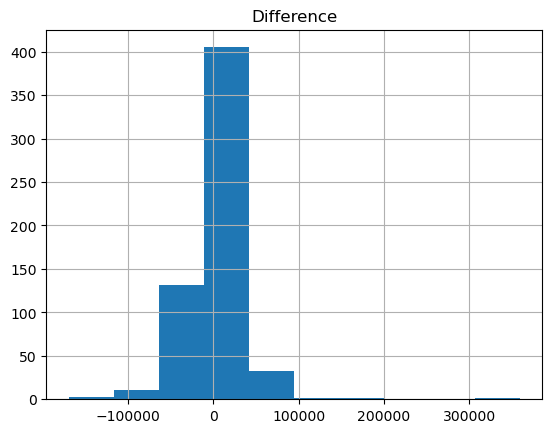

In [250]:
y_test.hist('Difference')
#Based on the histogram most of the prediction is around 0

In [254]:
#We wanted to know how accurate the model is within 15% of the actual values
y_test['perc_difference'] = ((y_test['SalePrice_predicted'] - y_test['SalePrice']) / y_test['SalePrice']).abs() * 100

acceptable_range = 15  # Acceptable percentage difference
accuracy = (y_test['perc_difference'] <= acceptable_range).mean() * 100
print(f"Accuracy within {acceptable_range}% of actual values: {accuracy:.2f}%")


Accuracy within 15% of actual values: 70.82%


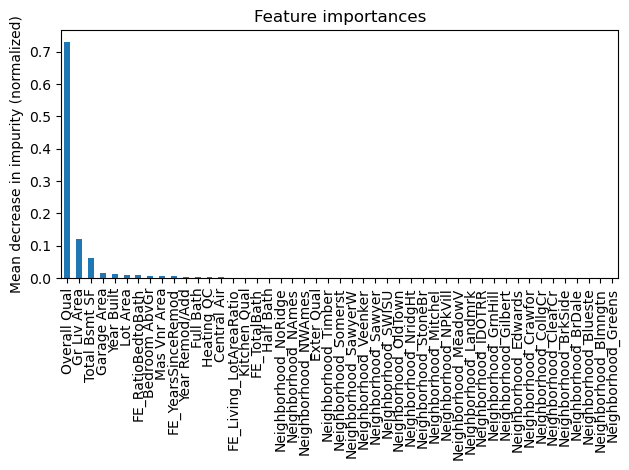

In [251]:
#Results of the most important features for this model
feat_importance = tree_reg.feature_importances_
tree_importances = pd.Series(feat_importance, index=x_test.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
tree_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity (normalized)")
fig.tight_layout()

In [207]:
#For this model the top most important features are Overall Qual, Gr Liv Area, Total Bsmt SF, External Quality
#It appears that the quality of the material and the house is significant in predicting Sale Price and also the 
#..total Area of the house. This is aligned with the intuition that Quality and Area is a good predictor for
#..predicting Sale Price 